https://towardsdatascience.com/how-to-extract-data-from-ms-word-documents-using-python-ed3fbb48c122

https://github.com/nmolivo/tesu_scraper/blob/master/Python_Blogs/01_extract_from_MSWord.ipynb

https://python-docx.readthedocs.io/en/latest/index.html

## Первый способ: zipfile + beautiful soup

In [98]:
import zipfile
import xml.dom.minidom
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
document = zipfile.ZipFile('cropped_example.docx')

In [3]:
document.namelist()

['_rels/.rels',
 'docProps/core.xml',
 'docProps/app.xml',
 'word/document.xml',
 'word/styles.xml',
 'word/fontTable.xml',
 'word/numbering.xml',
 'word/theme/theme1.xml',
 'word/header1.xml',
 'word/footer1.xml',
 'word/settings.xml',
 'word/_rels/document.xml.rels',
 '[Content_Types].xml']

In [4]:
uglyXml = xml.dom.minidom.parseString(document.read('word/document.xml')).toprettyxml(indent='  ')

In [5]:
bs = BeautifulSoup(uglyXml, 'xml')

In [9]:
# some doc properties - it's not useful for us
print(BeautifulSoup(document.read('docProps/core.xml'), 'xml').prettify())
print(BeautifulSoup(document.read('docProps/app.xml'), 'xml').prettify())

<?xml version="1.0" encoding="utf-8"?>
<cp:coreProperties xmlns:cp="http://schemas.openxmlformats.org/package/2006/metadata/core-properties" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:dcterms="http://purl.org/dc/terms/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"/>

<?xml version="1.0" encoding="utf-8"?>
<Properties xmlns="http://schemas.openxmlformats.org/officeDocument/2006/extended-properties" xmlns:vt="http://schemas.openxmlformats.org/officeDocument/2006/docPropsVTypes"/>



In [13]:
# doc styles
print(BeautifulSoup(document.read('word/styles.xml'), 'xml').prettify()[:1000])

<?xml version="1.0" encoding="utf-8"?>
<w:styles mc:Ignorable="w14" xmlns:mc="http://schemas.openxmlformats.org/markup-compatibility/2006" xmlns:w="http://schemas.openxmlformats.org/wordprocessingml/2006/main" xmlns:w14="http://schemas.microsoft.com/office/word/2010/wordml">
 <w:docDefaults>
  <w:rPrDefault>
   <w:rPr>
    <w:rFonts w:ascii="Times New Roman" w:cs="Times New Roman" w:eastAsia="Arial Unicode MS" w:hAnsi="Times New Roman"/>
    <w:b w:val="0"/>
    <w:bCs w:val="0"/>
    <w:i w:val="0"/>
    <w:iCs w:val="0"/>
    <w:caps w:val="0"/>
    <w:smallCaps w:val="0"/>
    <w:strike w:val="0"/>
    <w:dstrike w:val="0"/>
    <w:outline w:val="0"/>
    <w:emboss w:val="0"/>
    <w:imprint w:val="0"/>
    <w:vanish w:val="0"/>
    <w:color w:val="auto"/>
    <w:spacing w:val="0"/>
    <w:w w:val="100"/>
    <w:kern w:val="0"/>
    <w:position w:val="0"/>
    <w:sz w:val="20"/>
    <w:szCs w:val="20"/>
    <w:u w:color="auto" w:val="none"/>
    <w:bdr w:val="nil"/>
    <w:vertAlign

In [19]:
print(BeautifulSoup(document.read('word/fontTable.xml'), 'xml').prettify())

<?xml version="1.0" encoding="utf-8"?>
<w:fonts xmlns:w="http://schemas.openxmlformats.org/wordprocessingml/2006/main">
 <w:font w:name="Times New Roman">
  <w:charset w:val="00"/>
  <w:family w:val="roman"/>
  <w:pitch w:val="variable"/>
 </w:font>
 <w:font w:name="Symbol">
  <w:charset w:val="02"/>
  <w:family w:val="roman"/>
  <w:pitch w:val="variable"/>
 </w:font>
 <w:font w:name="Arial">
  <w:charset w:val="00"/>
  <w:family w:val="swiss"/>
  <w:pitch w:val="variable"/>
 </w:font>
 <w:font w:name="Arial Unicode MS">
  <w:charset w:val="00"/>
  <w:family w:val="roman"/>
  <w:pitch w:val="default"/>
 </w:font>
 <w:font w:name="Helvetica Neue">
  <w:charset w:val="00"/>
  <w:family w:val="roman"/>
  <w:pitch w:val="default"/>
 </w:font>
 <w:font w:name="Calibri">
  <w:charset w:val="00"/>
  <w:family w:val="roman"/>
  <w:pitch w:val="default"/>
 </w:font>
</w:fonts>


In [20]:
print(BeautifulSoup(document.read('word/numbering.xml'), 'xml').prettify()[:2000])

<?xml version="1.0" encoding="utf-8"?>
<w:numbering xmlns:o="urn:schemas-microsoft-com:office:office" xmlns:r="http://schemas.openxmlformats.org/officeDocument/2006/relationships" xmlns:v="urn:schemas-microsoft-com:vml" xmlns:w="http://schemas.openxmlformats.org/wordprocessingml/2006/main" xmlns:w14="http://schemas.microsoft.com/office/word/2010/wordml" xmlns:wp="http://schemas.openxmlformats.org/drawingml/2006/wordprocessingDrawing">
 <w:abstractNum w:abstractNumId="0">
  <w:multiLevelType w:val="hybridMultilevel"/>
  <w:numStyleLink w:val="Imported Style 2"/>
 </w:abstractNum>
 <w:abstractNum w:abstractNumId="1">
  <w:multiLevelType w:val="hybridMultilevel"/>
  <w:styleLink w:val="Imported Style 2"/>
  <w:lvl w:ilvl="0">
   <w:start w:val="1"/>
   <w:numFmt w:val="decimal"/>
   <w:suff w:val="tab"/>
   <w:lvlText w:val="%1."/>
   <w:lvlJc w:val="left"/>
   <w:pPr>
    <w:tabs>
     <w:tab w:pos="1276" w:val="left"/>
     <w:tab w:pos="1416" w:val="left"/>
     <w:tab w:pos="1935" w:v

In [22]:
print(BeautifulSoup(document.read('word/header1.xml'), 'xml').prettify())
print()
print(BeautifulSoup(document.read('word/footer1.xml'), 'xml').prettify())

<?xml version="1.0" encoding="utf-8"?>
<w:hdr mc:Ignorable="w14" xmlns:m="http://schemas.openxmlformats.org/officeDocument/2006/math" xmlns:mc="http://schemas.openxmlformats.org/markup-compatibility/2006" xmlns:o="urn:schemas-microsoft-com:office:office" xmlns:r="http://schemas.openxmlformats.org/officeDocument/2006/relationships" xmlns:v="urn:schemas-microsoft-com:vml" xmlns:w="http://schemas.openxmlformats.org/wordprocessingml/2006/main" xmlns:w10="urn:schemas-microsoft-com:office:word" xmlns:w14="http://schemas.microsoft.com/office/word/2010/wordml" xmlns:wp="http://schemas.openxmlformats.org/drawingml/2006/wordprocessingDrawing" xmlns:wpg="http://schemas.microsoft.com/office/word/2010/wordprocessingGroup" xmlns:wps="http://schemas.microsoft.com/office/word/2010/wordprocessingShape">
 <w:p>
  <w:pPr>
   <w:pStyle w:val="Header &amp; Footer"/>
   <w:bidi w:val="0"/>
  </w:pPr>
  <w:r/>
 </w:p>
</w:hdr>

<?xml version="1.0" encoding="utf-8"?>
<w:ftr mc:Ignorable="w14" xmlns:m="http://

In [23]:
print(BeautifulSoup(document.read('word/theme/theme1.xml'), 'xml').prettify()[:1000])

<?xml version="1.0" encoding="utf-8"?>
<a:theme name="Blank" xmlns:a="http://schemas.openxmlformats.org/drawingml/2006/main" xmlns:r="http://schemas.openxmlformats.org/officeDocument/2006/relationships">
 <a:themeElements>
  <a:clrScheme name="Blank">
   <a:dk1>
    <a:srgbClr val="000000"/>
   </a:dk1>
   <a:lt1>
    <a:srgbClr val="FFFFFF"/>
   </a:lt1>
   <a:dk2>
    <a:srgbClr val="A7A7A7"/>
   </a:dk2>
   <a:lt2>
    <a:srgbClr val="535353"/>
   </a:lt2>
   <a:accent1>
    <a:srgbClr val="00A2FF"/>
   </a:accent1>
   <a:accent2>
    <a:srgbClr val="16E7CF"/>
   </a:accent2>
   <a:accent3>
    <a:srgbClr val="61D836"/>
   </a:accent3>
   <a:accent4>
    <a:srgbClr val="FFD932"/>
   </a:accent4>
   <a:accent5>
    <a:srgbClr val="FF644E"/>
   </a:accent5>
   <a:accent6>
    <a:srgbClr val="FF42A1"/>
   </a:accent6>
   <a:hlink>
    <a:srgbClr val="0000FF"/>
   </a:hlink>
   <a:folHlink>
    <a:srgbClr val="FF00FF"/>
   </a:folHlink>
  </a:clrScheme>
  <a:fontScheme name="Blank">
   

In [24]:
print(BeautifulSoup(document.read('word/settings.xml'), 'xml').prettify())

<?xml version="1.0" encoding="utf-8"?>
<w:settings xmlns:mc="http://schemas.openxmlformats.org/markup-compatibility/2006" xmlns:o="urn:schemas-microsoft-com:office:office" xmlns:v="urn:schemas-microsoft-com:vml" xmlns:w="http://schemas.openxmlformats.org/wordprocessingml/2006/main">
 <w:view w:val="print"/>
 <w:mirrorMargins w:val="0"/>
 <w:bordersDoNotSurroundHeader w:val="0"/>
 <w:bordersDoNotSurroundFooter w:val="0"/>
 <w:displayBackgroundShape/>
 <w:revisionView w:comments="1" w:formatting="0" w:insDel="1" w:markup="1"/>
 <w:defaultTabStop w:val="720"/>
 <w:autoHyphenation w:val="0"/>
 <w:evenAndOddHeaders w:val="0"/>
 <w:bookFoldPrinting w:val="0"/>
 <w:noLineBreaksAfter w:lang="English" w:val="‘“(〔[{〈《「『【⦅〘〖«〝︵︷︹︻︽︿﹁﹃﹇﹙﹛﹝｢"/>
 <w:noLineBreaksBefore w:lang="English" w:val="’”)〕]}〉"/>
 <w:compat>
  <w:compatSetting w:name="compatibilityMode" w:uri="http://schemas.microsoft.com/office/word" w:val="15"/>
 </w:compat>
 <w:clrSchemeMapping w:accent1="accent1" w:accent2="accent2" w:acce

In [38]:
# it's the text of the document
bs = BeautifulSoup(document.read('word/document.xml'), 'xml')

In [43]:
print(bs.prettify()[:2000])
# w:document -> w:body - the body of the document

<?xml version="1.0" encoding="utf-8"?>
<w:document mc:Ignorable="w14" xmlns:m="http://schemas.openxmlformats.org/officeDocument/2006/math" xmlns:mc="http://schemas.openxmlformats.org/markup-compatibility/2006" xmlns:o="urn:schemas-microsoft-com:office:office" xmlns:r="http://schemas.openxmlformats.org/officeDocument/2006/relationships" xmlns:v="urn:schemas-microsoft-com:vml" xmlns:w="http://schemas.openxmlformats.org/wordprocessingml/2006/main" xmlns:w10="urn:schemas-microsoft-com:office:word" xmlns:w14="http://schemas.microsoft.com/office/word/2010/wordml" xmlns:wp="http://schemas.openxmlformats.org/drawingml/2006/wordprocessingDrawing" xmlns:wpg="http://schemas.microsoft.com/office/word/2010/wordprocessingGroup" xmlns:wps="http://schemas.microsoft.com/office/word/2010/wordprocessingShape">
 <w:body>
  <w:p>
   <w:pPr>
    <w:pStyle w:val="Default"/>
    <w:tabs>
     <w:tab w:pos="6565" w:val="left"/>
     <w:tab w:pos="7080" w:val="left"/>
     <w:tab w:pos="7788" w:val="left"/>
   

In [42]:
bs.find_all('w:p')[0]

<w:p><w:pPr><w:pStyle w:val="Default"/><w:tabs><w:tab w:pos="6565" w:val="left"/><w:tab w:pos="7080" w:val="left"/><w:tab w:pos="7788" w:val="left"/><w:tab w:pos="8496" w:val="left"/><w:tab w:pos="9132" w:val="left"/></w:tabs><w:suppressAutoHyphens w:val="1"/><w:spacing w:before="0"/><w:ind w:firstLine="567"/><w:jc w:val="center"/><w:rPr><w:rFonts w:ascii="Times New Roman" w:cs="Times New Roman" w:eastAsia="Times New Roman" w:hAnsi="Times New Roman"/><w:b w:val="1"/><w:bCs w:val="1"/><w:sz w:val="26"/><w:szCs w:val="26"/><w:u w:color="000000"/></w:rPr></w:pPr><w:r><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:hint="default"/><w:b w:val="1"/><w:bCs w:val="1"/><w:sz w:val="26"/><w:szCs w:val="26"/><w:u w:color="000000"/><w:rtl w:val="0"/><w:lang w:val="ru-RU"/></w:rPr><w:t xml:space="preserve">Договор № </w:t></w:r><w:r><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman"/><w:b w:val="1"/><w:bCs w:val="1"/><w:sz w:val="26"/><w:szCs w:val="26"/><w:

In [52]:
# w:document -> w:body -> w:p
bs.contents[0].contents[0].contents[0]

<w:p><w:pPr><w:pStyle w:val="Default"/><w:tabs><w:tab w:pos="6565" w:val="left"/><w:tab w:pos="7080" w:val="left"/><w:tab w:pos="7788" w:val="left"/><w:tab w:pos="8496" w:val="left"/><w:tab w:pos="9132" w:val="left"/></w:tabs><w:suppressAutoHyphens w:val="1"/><w:spacing w:before="0"/><w:ind w:firstLine="567"/><w:jc w:val="center"/><w:rPr><w:rFonts w:ascii="Times New Roman" w:cs="Times New Roman" w:eastAsia="Times New Roman" w:hAnsi="Times New Roman"/><w:b w:val="1"/><w:bCs w:val="1"/><w:sz w:val="26"/><w:szCs w:val="26"/><w:u w:color="000000"/></w:rPr></w:pPr><w:r><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:hint="default"/><w:b w:val="1"/><w:bCs w:val="1"/><w:sz w:val="26"/><w:szCs w:val="26"/><w:u w:color="000000"/><w:rtl w:val="0"/><w:lang w:val="ru-RU"/></w:rPr><w:t xml:space="preserve">Договор № </w:t></w:r><w:r><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman"/><w:b w:val="1"/><w:bCs w:val="1"/><w:sz w:val="26"/><w:szCs w:val="26"/><w:

In [54]:
w_p = bs.contents[0].contents[0].contents[0]
w_p.find_all('w:t')

[<w:t xml:space="preserve">Договор № </w:t>, <w:t>____</w:t>]

In [60]:
w_body = bs.contents[0].contents[0]

for i in range(len(w_body.contents)):
    print(w_body.contents[i].find_all('w:t'))

[<w:t xml:space="preserve">Договор № </w:t>, <w:t>____</w:t>]
[<w:t xml:space="preserve">на выполнение комплекса работ и услуг по содержанию объектов </w:t>, <w:t>(</w:t>, <w:t>зданий и строений</w:t>, <w:t xml:space="preserve">), </w:t>, <w:t xml:space="preserve">сервисному и техническому обслуживанию комплекса объектов инженерной инфраструктуры </w:t>]
[]
[<w:t>г</w:t>, <w:t xml:space="preserve">. </w:t>, <w:t xml:space="preserve">Москва </w:t>, <w:t>«</w:t>, <w:t>___</w:t>, <w:t>»</w:t>, <w:t xml:space="preserve">________2015 </w:t>, <w:t>года</w:t>]
[]
[<w:t xml:space="preserve">Общество с ограниченной ответственностью «Объединенная дирекция по управлению активами и сервисами Центра разработки и коммерциализации новых технологий </w:t>, <w:t>(</w:t>, <w:t>инновационного центра «Сколково»</w:t>, <w:t>)</w:t>, <w:t xml:space="preserve">» </w:t>, <w:t>(</w:t>, <w:t>ООО «ОДАС Сколково»</w:t>, <w:t>)</w:t>, <w:t xml:space="preserve">, </w:t>, <w:t>именуемое в дальнейшем «</w:t>, <w:t>За

In [64]:
for i in range(len(w_body.contents)):
    word_list = w_body.contents[i].find_all('w:t')
    line = '|||'.join([x.text for x in word_list])
    print(line)
    print('=========')
    
# w:t - text of the element

Договор № |||____
на выполнение комплекса работ и услуг по содержанию объектов |||(|||зданий и строений|||), |||сервисному и техническому обслуживанию комплекса объектов инженерной инфраструктуры 

г|||. |||Москва |||«|||___|||»|||________2015 |||года

Общество с ограниченной ответственностью «Объединенная дирекция по управлению активами и сервисами Центра разработки и коммерциализации новых технологий |||(|||инновационного центра «Сколково»|||)|||» |||(|||ООО «ОДАС Сколково»|||)|||, |||именуемое в дальнейшем «|||Заказчик|||»|||, |||в лице Директора Дирекции по эксплуатации объектов недвижимости  Троценко Дениса Сергеевича|||, |||действующего на основании Доверенности № |||37 |||от |||10.07.2015 |||г|||., |||с одной стороны|||, |||и
 |||______________________________________(__)_, |||именуемое в дальнейшем «|||Исполнитель|||»|||, |||в лице |||__________________________________, |||действующего на основании |||_______________, |||с другой стороны|||, |||в дальнейшем совместно именуемые 

In [69]:
print(bs.contents[0].contents[0].contents[7].prettify())

# w:pPr - properties of w:p
# w:p -> w:pPr, w:r, ..., w:r

<w:p>
 <w:pPr>
  <w:pStyle w:val="Default"/>
  <w:tabs>
   <w:tab w:pos="540" w:val="left"/>
   <w:tab w:pos="708" w:val="left"/>
   <w:tab w:pos="1416" w:val="left"/>
   <w:tab w:pos="2124" w:val="left"/>
   <w:tab w:pos="2832" w:val="left"/>
   <w:tab w:pos="3540" w:val="left"/>
   <w:tab w:pos="4248" w:val="left"/>
   <w:tab w:pos="4956" w:val="left"/>
   <w:tab w:pos="5664" w:val="left"/>
   <w:tab w:pos="6372" w:val="left"/>
   <w:tab w:pos="7080" w:val="left"/>
   <w:tab w:pos="7788" w:val="left"/>
   <w:tab w:pos="8496" w:val="left"/>
   <w:tab w:pos="9132" w:val="left"/>
  </w:tabs>
  <w:suppressAutoHyphens w:val="1"/>
  <w:spacing w:before="0"/>
  <w:ind w:firstLine="709"/>
  <w:jc w:val="both"/>
  <w:rPr>
   <w:rFonts w:ascii="Times New Roman" w:cs="Times New Roman" w:eastAsia="Times New Roman" w:hAnsi="Times New Roman"/>
   <w:b w:val="1"/>
   <w:bCs w:val="1"/>
   <w:sz w:val="26"/>
   <w:szCs w:val="26"/>
   <w:u w:color="000000"/>
  </w:rPr>
 </w:pPr>
 <w:r>
  <w:rPr>
   

In [74]:
w_p = bs.contents[0].contents[0].contents[7]
print(w_p.contents[1].prettify())
# w:r - separate word (or some element) with common properties

## w:rPr - properties of w:r
#### w:rFonts - fonts of w:r
#### w:b - bold font
#### w:sz - font size
#### w:color - text color
#### w:lang - language

## w:t - text of w:r

<w:r>
 <w:rPr>
  <w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:hint="default"/>
  <w:b w:val="1"/>
  <w:bCs w:val="1"/>
  <w:sz w:val="26"/>
  <w:szCs w:val="26"/>
  <w:u w:color="000000"/>
  <w:rtl w:val="0"/>
  <w:lang w:val="ru-RU"/>
 </w:rPr>
 <w:t xml:space="preserve">
  Статья
 </w:t>
</w:r>



In [81]:
w_p = bs.contents[0].contents[0].contents[5]
print(w_p.contents[10].prettify())

<w:r>
 <w:rPr>
  <w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:hint="default"/>
  <w:sz w:val="26"/>
  <w:szCs w:val="26"/>
  <w:u w:color="000000"/>
  <w:rtl w:val="0"/>
  <w:lang w:val="ru-RU"/>
 </w:rPr>
 <w:t>
  именуемое в дальнейшем «
 </w:t>
</w:r>



In [83]:
print(w_p.prettify()[:1000])

<w:p>
 <w:pPr>
  <w:pStyle w:val="Default"/>
  <w:tabs>
   <w:tab w:pos="708" w:val="left"/>
   <w:tab w:pos="1416" w:val="left"/>
   <w:tab w:pos="2124" w:val="left"/>
   <w:tab w:pos="2832" w:val="left"/>
   <w:tab w:pos="3540" w:val="left"/>
   <w:tab w:pos="4248" w:val="left"/>
   <w:tab w:pos="4956" w:val="left"/>
   <w:tab w:pos="5664" w:val="left"/>
   <w:tab w:pos="6372" w:val="left"/>
   <w:tab w:pos="7080" w:val="left"/>
   <w:tab w:pos="7788" w:val="left"/>
   <w:tab w:pos="8496" w:val="left"/>
   <w:tab w:pos="9132" w:val="left"/>
  </w:tabs>
  <w:suppressAutoHyphens w:val="1"/>
  <w:spacing w:after="120" w:before="0"/>
  <w:ind w:firstLine="567"/>
  <w:jc w:val="both"/>
  <w:rPr>
   <w:rFonts w:ascii="Times New Roman" w:cs="Times New Roman" w:eastAsia="Times New Roman" w:hAnsi="Times New Roman"/>
   <w:sz w:val="26"/>
   <w:szCs w:val="26"/>
   <w:u w:color="000000"/>
  </w:rPr>
 </w:pPr>
 <w:r>
  <w:rPr>
   <w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:h

In [84]:
document = zipfile.ZipFile('example2.docx')

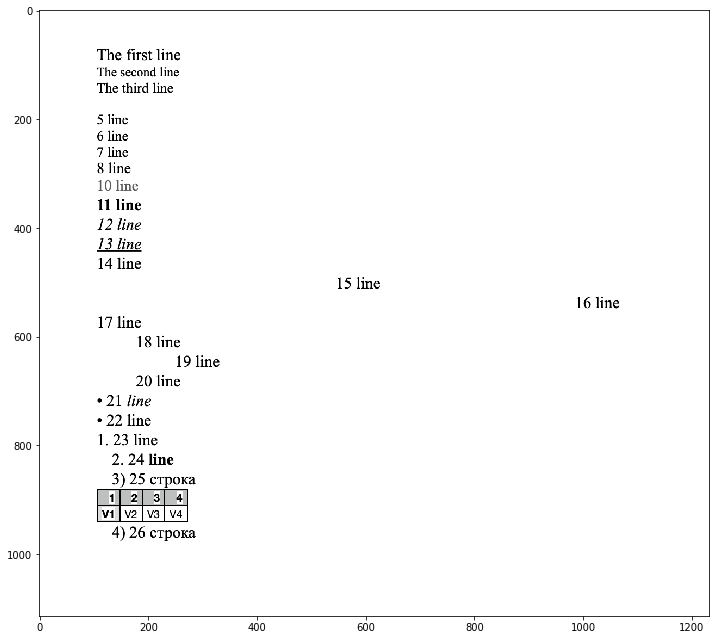

In [100]:
img = mpimg.imread('example2.png')
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.show()

In [87]:
print(BeautifulSoup(document.read('word/document.xml'), 'xml').prettify())

<?xml version="1.0" encoding="utf-8"?>
<w:document mc:Ignorable="w14" xmlns:m="http://schemas.openxmlformats.org/officeDocument/2006/math" xmlns:mc="http://schemas.openxmlformats.org/markup-compatibility/2006" xmlns:o="urn:schemas-microsoft-com:office:office" xmlns:r="http://schemas.openxmlformats.org/officeDocument/2006/relationships" xmlns:v="urn:schemas-microsoft-com:vml" xmlns:w="http://schemas.openxmlformats.org/wordprocessingml/2006/main" xmlns:w10="urn:schemas-microsoft-com:office:word" xmlns:w14="http://schemas.microsoft.com/office/word/2010/wordml" xmlns:wp="http://schemas.openxmlformats.org/drawingml/2006/wordprocessingDrawing" xmlns:wpg="http://schemas.microsoft.com/office/word/2010/wordprocessingGroup" xmlns:wps="http://schemas.microsoft.com/office/word/2010/wordprocessingShape">
 <w:body>
  <w:p>
   <w:pPr>
    <w:pStyle w:val="Body"/>
    <w:bidi w:val="0"/>
   </w:pPr>
   <w:r>
    <w:rPr>
     <w:rtl w:val="0"/>
    </w:rPr>
    <w:t>
     The first line
    </w:t>
   <

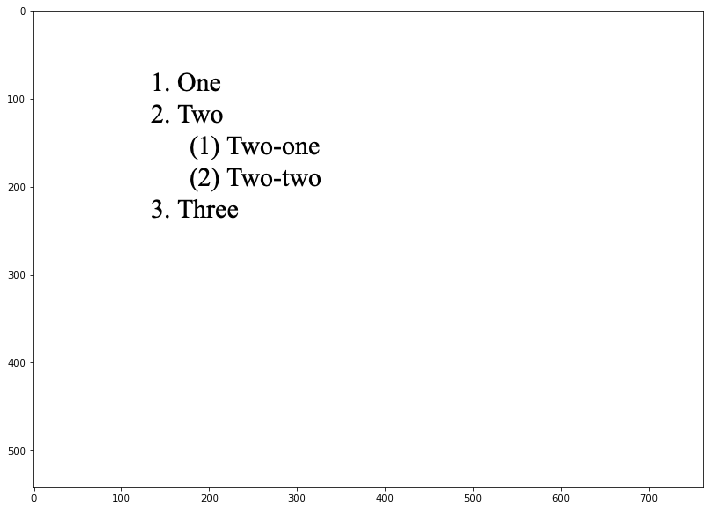

In [101]:
img = mpimg.imread('example3.png')
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.show()

In [102]:
document = zipfile.ZipFile('example3.docx')

In [103]:
print(BeautifulSoup(document.read('word/document.xml'), 'xml').prettify())

<?xml version="1.0" encoding="utf-8"?>
<w:document mc:Ignorable="w14" xmlns:m="http://schemas.openxmlformats.org/officeDocument/2006/math" xmlns:mc="http://schemas.openxmlformats.org/markup-compatibility/2006" xmlns:o="urn:schemas-microsoft-com:office:office" xmlns:r="http://schemas.openxmlformats.org/officeDocument/2006/relationships" xmlns:v="urn:schemas-microsoft-com:vml" xmlns:w="http://schemas.openxmlformats.org/wordprocessingml/2006/main" xmlns:w10="urn:schemas-microsoft-com:office:word" xmlns:w14="http://schemas.microsoft.com/office/word/2010/wordml" xmlns:wp="http://schemas.openxmlformats.org/drawingml/2006/wordprocessingDrawing" xmlns:wpg="http://schemas.microsoft.com/office/word/2010/wordprocessingGroup" xmlns:wps="http://schemas.microsoft.com/office/word/2010/wordprocessingShape">
 <w:body>
  <w:p>
   <w:pPr>
    <w:pStyle w:val="Body"/>
    <w:numPr>
     <w:ilvl w:val="0"/>
     <w:numId w:val="1"/>
    </w:numPr>
    <w:bidi w:val="0"/>
   </w:pPr>
   <w:r>
    <w:rPr>
  